In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
data = pd.read_csv('final.csv', encoding='iso-8859-1')
# data['LengthNumeric'] = data['EndNumeric'] - data['StartNumeric']
# data.drop(columns=['Unnamed: 0'], inplace=True)
# data.to_csv("final.csv", index=False)

In [3]:
data[data['LengthNumeric'] > 7]

,Semester,SchoolName,DepartmentName,CourseCode,CourseName,CourseDescription,Schedule,Timing,Location,Instructors,...,isWednesday,isThursday,isFriday,isSaturday,isSunday,StartHour24,EndHour24,StartNumeric,EndNumeric,LengthNumeric
2106,SP2024,Arts & Sciences,POLITICAL SCIENCE(L32),L32 PolSci 3341,Topics in Politics: Free Speech on Campus,For generations controversies over free expres...,-----S- / ----F--,8:00A-6:00P / 12:00P-5:00P,AB Law Bldg,Martin- Epstein,...,False,False,False,True,False,8.0,18.0,8.00,18.000000,10.000000
3738,SP2024,Business,MANAGEMENT(B53),B53 MGT 660,Seminar on Presentation Skills,The goal of this course is to teach students t...,-T-----,9:00A-4:20P,Knight Hall,Cryder,...,False,False,False,False,False,9.0,16.0,9.00,16.333333,7.333333
4038,SP2024,Business,ORGANIZATIONAL BEHAVIOR(B66),B66 OB 524,Negotiation,Managers spend the majority of their time nego...,------S / ----FSS,8:45A-4:15P / 8:45A-5:00P,Bauer,Elfenbein,...,False,False,False,False,True,8.0,16.0,8.75,16.250000,7.500000
4120,SP2024,Business,MANAGEMENT(B63),B63 MGT 5321,Business/ Government and Society,All firms operate within competitive and insti...,-----SS,8:30A-5:00P,Simon,Gorman,...,False,False,False,True,True,8.0,17.0,8.50,17.000000,8.500000
6153,SP2024,Social Work & Public Health,Practice Methods(S30),S30 SWDP 5504,Dialectical Behavior Therapy,An introduction to Dialectical Behavioral Ther...,-----SS,9:00A-5:00P,Hillman,Lindsay,...,False,False,False,True,True,9.0,17.0,9.00,17.000000,8.000000
6160,SP2024,Social Work & Public Health,Practice Methods(S30),S30 SWDP 9453,Principles/ Practices & Services in Substance ...,Focuses on factors that contribute to the abus...,-----SS,9:00A-5:00P,Hillman,Begay,...,False,False,False,True,True,9.0,17.0,9.00,17.000000,8.000000
6253,SP2024,Social Work & Public Health,Skill Labs(S81),S81 SKILL 5049,Cognitive Processing Therapy,Cognitive Processing Therapy (CPT) is an evide...,-----SS,9:00A-5:00P,Hillman,Keyes,...,False,False,False,True,True,9.0,17.0,9.00,17.000000,8.000000
6254,SP2024,Social Work & Public Health,Skill Labs(S81),S81 SKILL 5066,Teen Outreach Program (TOP),This skills lab will provide students with kno...,----FSS,9:00A-5:00P,Hillman,Carter,...,False,False,True,True,True,9.0,17.0,9.00,17.000000,8.000000
6263,SP2024,Social Work & Public Health,Skill Labs(S81),S81 SKILL 5504,Introduction to System Dynamics for Advancing ...,This course exposes students to a systems appr...,-----SS,9:00A-5:00P,Hillman,Pritchard,...,False,False,False,True,True,9.0,17.0,9.00,17.000000,8.000000
6337,SP2024,Social Work & Public Health,Theory Problems & Issues(S20),S20 SWHS 5017,Management & Leadership of Organizations,This course has controlled registration for al...,MTWRF--,8:00A-5:00P,Hillman,Gibson,...,True,True,True,False,False,8.0,17.0,8.00,17.000000,9.000000


In [4]:
allTimeStrings = []
zoom = 10

for h in range(7, 11+1):
  hourString = '{:02d}'.format(h)
  for m in range(0, 59+1, zoom):
    minString = '{:02d}'.format(m)
    allTimeStrings.append(f'{hourString}:{minString}a')
    
h = 12
hourString = '{:02d}'.format(h)
for m in range(0, 59+1, zoom):
  minString = '{:02d}'.format(m)
  allTimeStrings.append(f'{hourString}:{minString}p')
  
for h in range(1, 10+1):
  hourString = '{:02d}'.format(h)
  for m in range(0, 59+1, zoom):
    minString = '{:02d}'.format(m)
    allTimeStrings.append(f'{hourString}:{minString}p')
    
allTimeStrings = allTimeStrings[4:-7]

In [5]:
allTimeStrings = allTimeStrings[4:-7]

In [6]:
def roundMinutes(minutes, roundFlag=False):
  if minutes % 10 != 0:
    minutes = ((minutes // 10) + 1) * 10
    
  if minutes == 60:
    roundFlag = True
  return [minutes, roundFlag]

def flipAmp(amp):
  amp = amp.lower()
  if amp == 'a':
    return 'p'
  return 'a'

def incrementHour(hour, ampm):
  amp = ampm.lower()
  hour += 1
  if hour == 13:
    return 1, amp
  if hour == 12:
    return 12, flipAmp(amp)
  return hour, amp

def getTimeString(hour, minutes, ampm):
  minutes, roundHour = roundMinutes(minutes)
  if roundHour:
    hour, ampm = incrementHour(hour, ampm)
  hourString = '{:02d}'.format(hour)
  minString = '{:02d}'.format(minutes)
  amp = ampm.lower()
  return f'{hourString}:{minString}{amp}'


def getTimeNumeric(string):
  
  match = re.search(r"(\d{2}):(\d{2})([apAP])", string)
  hour, minute, amp = match.groups()
  hour = int(hour)
  minute = int(minute)
  amp = amp.lower()
  
  if amp == 'p':
    hour += 12
    if hour == 24:
      hour = 12
  elif (amp == 'a') & (hour == 12):
    hour = 0
  
  return float(hour) + (float(minute) / 60)


3114
2134


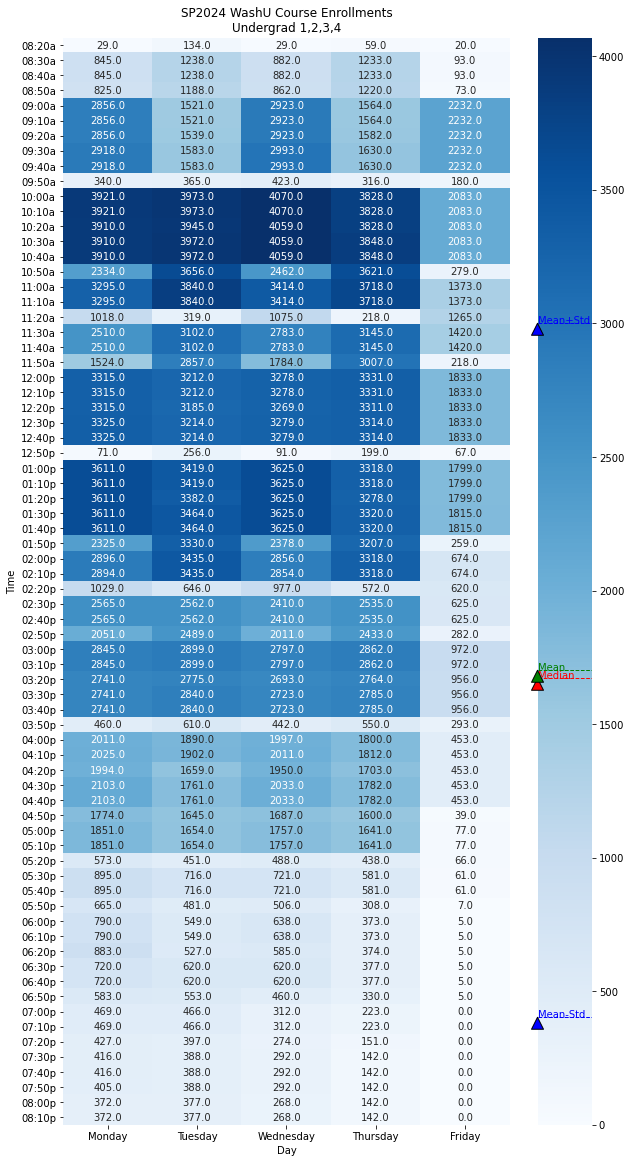

In [7]:
data = pd.read_csv('final.csv', encoding='iso-8859-1')
# data = data[(data['SchoolName'].isin(["Art", "Architecture"])) & 
#             (data['CourseNumber'].str[0].isin(["1", "2", "3", "4"]))
#             ]
data = data[(data['SchoolName'].isin(["Arts & Sciences", "Business", "Engineering", "Art", "Architecture"])) & 
            (data['CourseNumber'].str[0].isin(["1", "2", "3", "4"]))
            ]


# keywords = ['entrepreneurship', 'entrepreneurs', 'startup']
# columns_to_search = ['CourseName', 'CourseDescription']
# conditions = [data[col].str.contains(keyword, case=False) for col in columns_to_search for keyword in keywords]
# combined_condition = conditions[0]
# for condition in conditions[1:]:
#     combined_condition = combined_condition | condition


# data = data[combined_condition]
# data = data[(data['SchoolName'].isin(["Art", "Architecture", "Engineering", "Business", "Arts & Sciences"]))]
# data = data[(data['DepShortName'].isin(["CSE"])) & (data['CourseNumber'].str[0].isin(["1", "2", "3", "4"]))]
print(len(data))
data = data.drop_duplicates(subset=['CourseName', 'Schedule', 'Timing', 'Location', 'Room', 'Waitlisted', 'Enrolled', 'Capacity'])
print(len(data))

columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
enrolled_heat_map_data = pd.DataFrame(0, columns=columns, index=allTimeStrings)


for day in ['isMonday', 'isTuesday', 'isWednesday', 'isThursday', 'isFriday', 'isSaturday', 'isSunday']:
    for index, row in enrolled_heat_map_data.iterrows():
        timeNumeric = getTimeNumeric(index)
        occuring = data[(data[day]) & (timeNumeric < data['EndNumeric']) & (timeNumeric >= data['StartNumeric'])]
        enrolled_heat_map_data.at[index, day[2:]] += occuring['Enrolled'].sum()
        
        
enrolled_heat_map_data = enrolled_heat_map_data.iloc[:, :-2]

# Plot heatmap
plt.figure(figsize=(10, 20))
heatmap = sns.heatmap(enrolled_heat_map_data[:-2], cmap='Blues', annot=True, linewidths=0, fmt=".1f", cbar=True)
plt.title('SP2024 WashU Course Enrollments\nUndergrad 1,2,3,4')
plt.xlabel('Day')
plt.ylabel('Time')

# Calculate median, mean, and standard deviation
median_value = enrolled_heat_map_data.median().median()
mean_value = enrolled_heat_map_data.mean().mean()
std_value = enrolled_heat_map_data.stack().std()

# Add markers to the color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.axhline(median_value, color='red', linestyle='--', linewidth=1)
cbar.ax.annotate('Median', xy=(1.05, median_value), xytext=(1.1, median_value), color='red', fontsize=10,
                 arrowprops=dict(facecolor='red', shrink=0.05))
cbar.ax.axhline(mean_value, color='green', linestyle='--', linewidth=1)
cbar.ax.annotate('Mean', xy=(1.05, mean_value), xytext=(1.1, mean_value), color='green', fontsize=10,
                 arrowprops=dict(facecolor='green', shrink=0.05))
cbar.ax.axhline(mean_value + std_value, color='blue', linestyle='--', linewidth=1)
cbar.ax.annotate('Mean+Std', xy=(1.05, mean_value + std_value), xytext=(1.1, mean_value + std_value), color='blue', fontsize=10,
                 arrowprops=dict(facecolor='blue', shrink=0.05))
cbar.ax.axhline(mean_value - std_value, color='blue', linestyle='--', linewidth=1)
cbar.ax.annotate('Mean-Std', xy=(1.05, mean_value - std_value), xytext=(1.1, mean_value - std_value), color='blue', fontsize=10,
                 arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

In [202]:
data

,Semester,SchoolName,DepartmentName,CourseCode,CourseName,CourseDescription,Schedule,Timing,Location,Instructors,...,isWednesday,isThursday,isFriday,isSaturday,isSunday,StartHour24,EndHour24,StartNumeric,EndNumeric,LengthNumeric
268,SP2024,Art,ART (ELECTIVE STUDIO COURSES)(F20),F20 ART 236P,Design in Social Systems,This multidisciplinary seminar course will cov...,M-W----,1:00P-3:50P,Walker Hall,Acayo Laker,...,True,False,False,False,False,13.0,15.0,13.00,15.833333,2.833333
3725,SP2024,Business,MANAGEMENT(B53),B53 MGT 424,Business Planning for New Enterprises (The Hat...,In this course student teams pursue their own...,-T-----,4:00P-6:00P,Bauer,Villhard,...,False,False,False,False,False,16.0,18.0,16.00,18.000000,2.000000
3726,SP2024,Business,MANAGEMENT(B53),B53 MGT 432E,Business Management of Arts Organizations,This course is for students who want to work i...,M-W----,4:00P-5:20P,Simon,Solberg,...,True,False,False,False,False,16.0,17.0,16.00,17.333333,1.333333
3728,SP2024,Business,MANAGEMENT(B53),B53 MGT 445E,Entrepreneurship Through Acquisition,The CELect program is a consultative experient...,-T-----,2:30P-5:20P,Simon,Wolfe,...,False,False,False,False,False,14.0,17.0,14.50,17.333333,2.833333
3733,SP2024,Business,MANAGEMENT(B53),B53 MGT 475E,Innovating for Defense,This inter-disciplinary entrepreneurial course...,M------,2:00P-4:50P,Urbauer,Kehoe- Seper,...,False,False,False,False,False,14.0,16.0,14.00,16.833333,2.833333
3734,SP2024,Business,MANAGEMENT(B53),B53 MGT 477E,Launching and Scaling New Enterprises (The Lea...,This advanced entrepreneurship course acts as ...,M------,4:00P-6:00P,Simon,Luscri,...,False,False,False,False,False,16.0,18.0,16.00,18.000000,2.000000
3735,SP2024,Business,MANAGEMENT(B53),B53 MGT 478E,Ownership InsightsThe Competitive Advantage of...,his course is designed to introduce students t...,-T-----,6:15P-9:15P,Simon,Burke- Boumgarden,...,False,False,False,False,False,18.0,21.0,18.25,21.250000,3.000000
3743,SP2024,Business,MANAGEMENT(B53),B53 MGT 421,Introduction to Entrepreneurship,Through case studies frequent guest speakers ...,M-W----,10:00A-11:20A,Bauer,Hamilton,...,True,False,False,False,False,10.0,11.0,10.00,11.333333,1.333333
3904,SP2024,Business,MARKETING(B55),B55 MKT 400I,Business & Marketing Innovation,This course teaches students how to successful...,M-W----,11:30A-12:50P,Bauer,Wall,...,True,False,False,False,False,11.0,12.0,11.50,12.833333,1.333333
3907,SP2024,Business,MARKETING(B55),B55 MKT 431E,Marketing Metrics,Experiential Learning: Growing a startup is in...,M-W----,4:00P-5:20P,Bauer,Wall,...,True,False,False,False,False,16.0,17.0,16.00,17.333333,1.333333


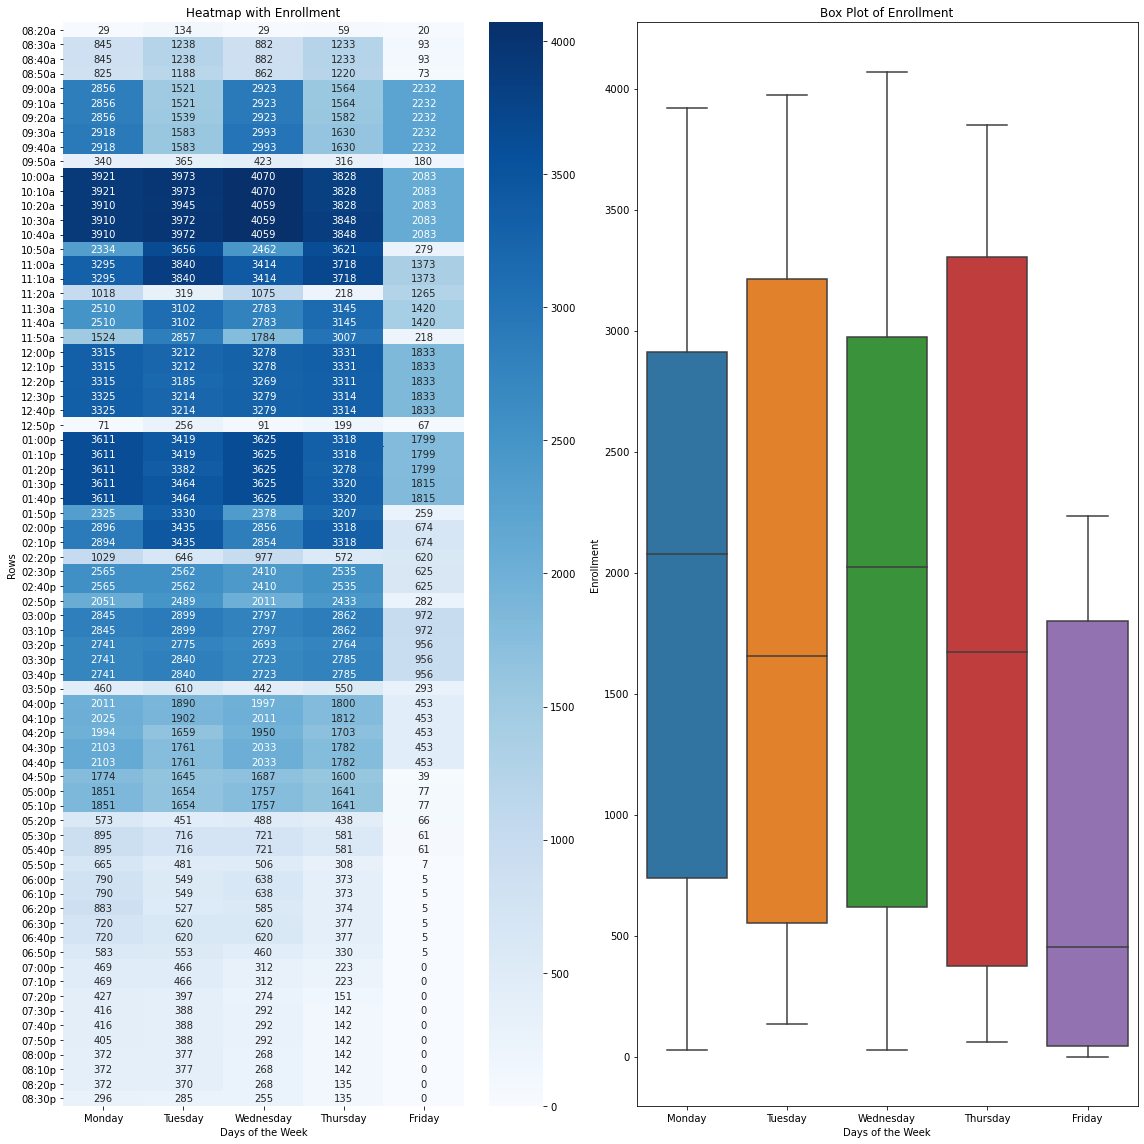

In [8]:
plt.figure(figsize=(16, 16))

plt.subplot(1, 2, 1)
heatmap = sns.heatmap(enrolled_heat_map_data, cmap='Blues', annot=True, fmt=".0f", annot_kws={"fontsize":10}, cbar=True)
plt.title('Heatmap with Enrollment')
plt.xlabel('Days of the Week')
plt.ylabel('Rows')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=enrolled_heat_map_data)
plt.title('Box Plot of Enrollment')
plt.xlabel('Days of the Week')
plt.ylabel('Enrollment')

plt.tight_layout()
plt.show()

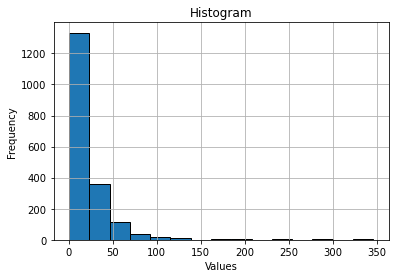

In [126]:
plt.hist(data['Enrolled'], bins=15, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [138]:
data['LengthNumeric'] = data['EndNumeric'] - data['StartNumeric']